# Linear Regression Example: Housing Price Prediction

## Multiple Linear Regression

### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

### Data
Use housing dataset.

## Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
housing = pd.DataFrame(pd.read_csv("./Housing.csv"))

In [9]:
housing['area'] = housing['area'] / 10
housing['price'] = housing['price'] / 10

In [10]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1330000.0,742.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,1225000.0,896.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1225000.0,996.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1221500.0,750.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,1141000.0,742.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Inspection

In [11]:
housing.shape

(545, 13)

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 55.5+ KB


In [13]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+05,515.054128,2.965138,1.286239,1.805505,0.693578
std,1.870440e+05,217.014102,0.738064,0.502470,0.867492,0.861586
min,1.750000e+05,165.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+05,360.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+05,460.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+05,636.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+06,1620.000000,6.000000,4.000000,4.000000,3.000000


## Data Cleaning

In [14]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

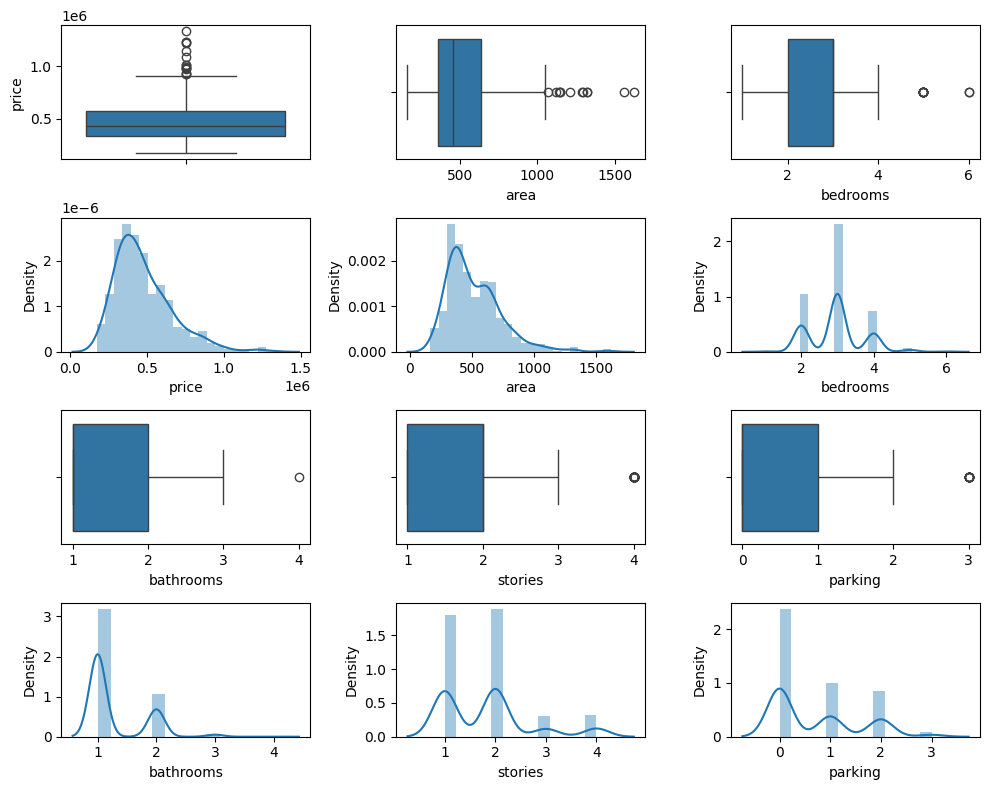

In [15]:
# Outlier and distribution Analysis
fig, axs = plt.subplots(4,3, figsize = (10,8))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0], orient="v")
plt1_d = sns.distplot(housing['price'], ax = axs[1,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1], orient="h")
plt2_d = sns.distplot(housing['area'], ax = axs[1,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2], orient="h")
plt3_d = sns.distplot(housing['bedrooms'], ax = axs[1,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[2,0], orient="h")
plt1 = sns.distplot(housing['bathrooms'], ax = axs[3,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[2,1], orient="h")
plt2 = sns.distplot(housing['stories'], ax = axs[3,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[2,2], orient="h")
plt3 = sns.distplot(housing['parking'], ax = axs[3,2])

plt.tight_layout()

In [9]:
# Outlier Treatment
# Price and area have considerable outliers.
# We can drop the outliers as we have sufficient data.

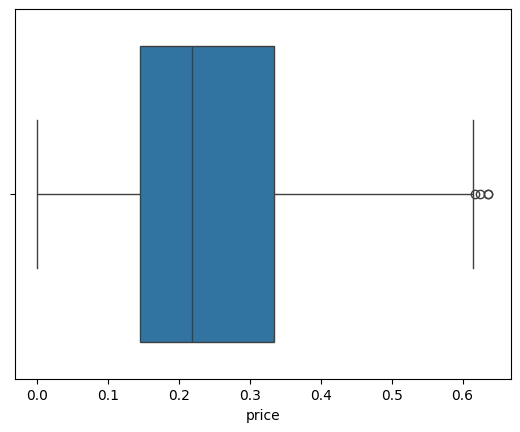

In [129]:
# outlier treatment for price
sns.boxplot(housing.price, orient="h")
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

<Axes: xlabel='price'>

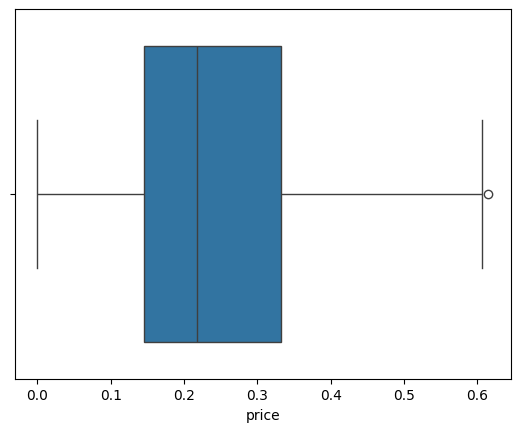

In [130]:
sns.boxplot(housing.price, orient="h")

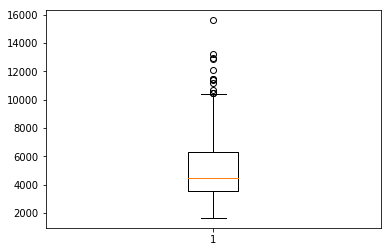

In [11]:
# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

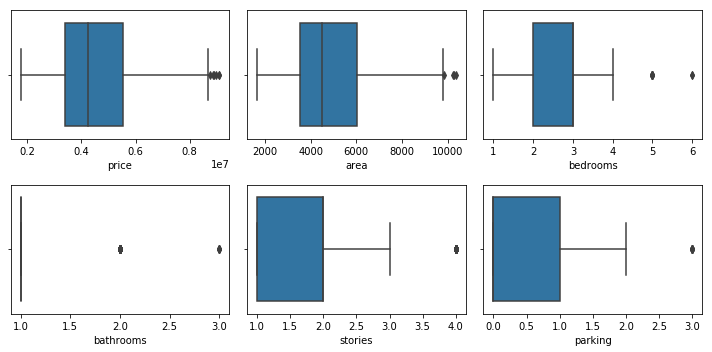

In [12]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

## Exploratory Data Analytics

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

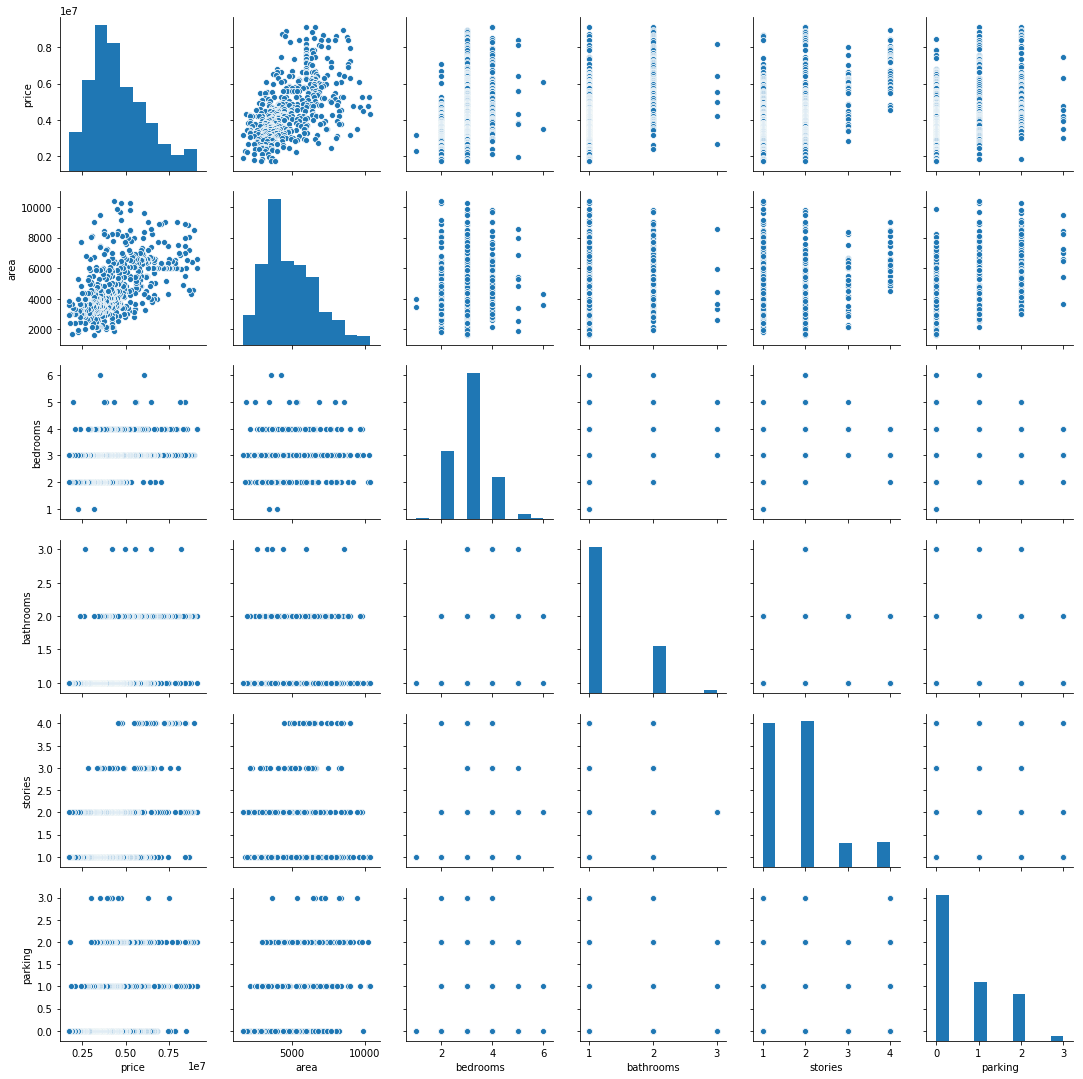

In [13]:
sns.pairplot(housing)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

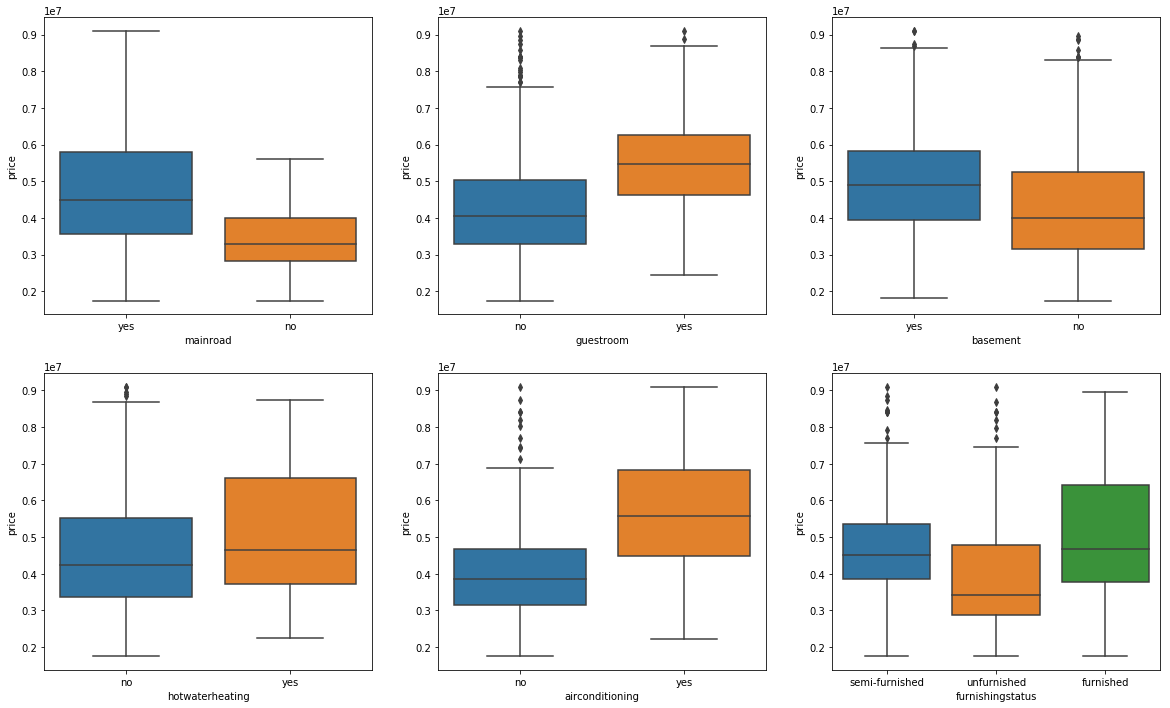

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `furnishingstatus` with `airconditioning` as the hue.

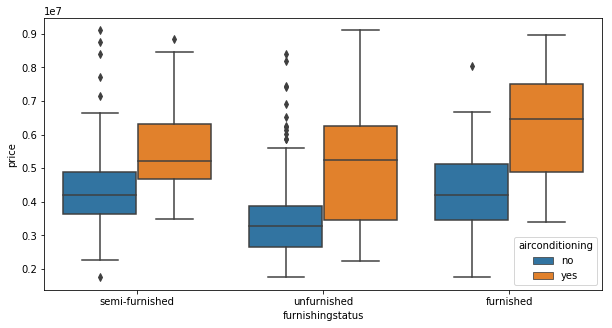

In [15]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

## Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [40]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1330000.0,742.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,1225000.0,896.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1225000.0,996.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1221500.0,750.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,1141000.0,742.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [43]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [41]:
main = housing['mainroad'].copy()
main

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
540    yes
541     no
542    yes
543     no
544    yes
Name: mainroad, Length: 545, dtype: object

In [19]:
main.map({"yes": 1, "no": 0})

0      1
1      1
2      1
3      1
4      1
      ..
540    1
541    0
542    1
543    0
544    1
Name: mainroad, Length: 545, dtype: int64

In [44]:
# Check the housing dataframe now

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1330000.0,742.0,4,2,3,1,0,0,0,1,2,1,furnished
1,1225000.0,896.0,4,4,4,1,0,0,0,1,3,0,furnished
2,1225000.0,996.0,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,1221500.0,750.0,4,2,2,1,0,1,0,1,3,1,furnished
4,1141000.0,742.0,4,1,2,1,1,1,0,1,2,0,furnished


### Dummy Variables

The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [18]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])

In [19]:
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [46]:
# Now let's see the head of our dataframe.
housing.pop("furnishingstatus")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,1330000.0,742.0,4,2,3,1,0,0,0,1,2,1
1,1225000.0,896.0,4,4,4,1,0,0,0,1,3,0
2,1225000.0,996.0,3,2,2,1,0,1,0,0,2,1
3,1221500.0,750.0,4,2,2,1,0,1,0,1,3,1
4,1141000.0,742.0,4,1,2,1,1,1,0,1,2,0


In [23]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [47]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,1330000.0,742.0,4,2,3,1,0,0,0,1,2,1
1,1225000.0,896.0,4,4,4,1,0,0,0,1,3,0
2,1225000.0,996.0,3,2,2,1,0,1,0,0,2,1
3,1221500.0,750.0,4,2,2,1,0,1,0,1,3,1
4,1141000.0,742.0,4,1,2,1,1,1,0,1,2,0


<Axes: xlabel='area', ylabel='price'>

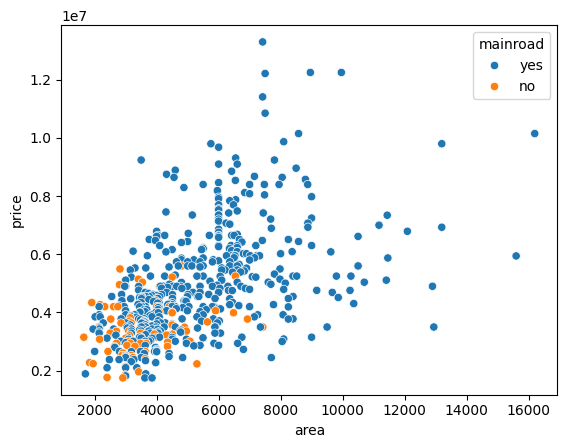

In [24]:
sns.scatterplot(data=housing, x="area", y="price", hue="mainroad")

In [ ]:
# !pip install scikit-learn

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [55]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
359,371000.0,360.0,3,1,1,1,0,0,0,0,1,0
19,885500.0,642.0,3,2,2,1,0,0,0,1,1,1
159,546000.0,315.0,3,2,1,1,1,1,0,1,0,0
35,808094.0,700.0,3,2,4,1,0,0,0,1,2,0
28,840000.0,795.0,5,2,2,1,0,1,1,0,2,0


In [78]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

housing[num_vars] = scaler.fit_transform(housing[num_vars])

### Splitting the Data into Training and Testing Sets

In [91]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [92]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
359,0.169697,0.134021,0.4,0.000000,0.000000,1,0,0,0,0,0.333333,0
19,0.615152,0.327835,0.4,0.333333,0.333333,1,0,0,0,1,0.333333,1
159,0.321212,0.103093,0.4,0.333333,0.000000,1,1,1,0,1,0.000000,0
35,0.548133,0.367698,0.4,0.333333,1.000000,1,0,0,0,1,0.666667,0
28,0.575758,0.432990,0.8,0.333333,0.333333,1,0,1,1,0,0.666667,0


In [93]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.238275,0.386352,0.090989,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596
std,0.157607,0.141695,0.147336,0.158217,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674
min,0.000000,0.012784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.134021,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.195876,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.323711,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,0.793814,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


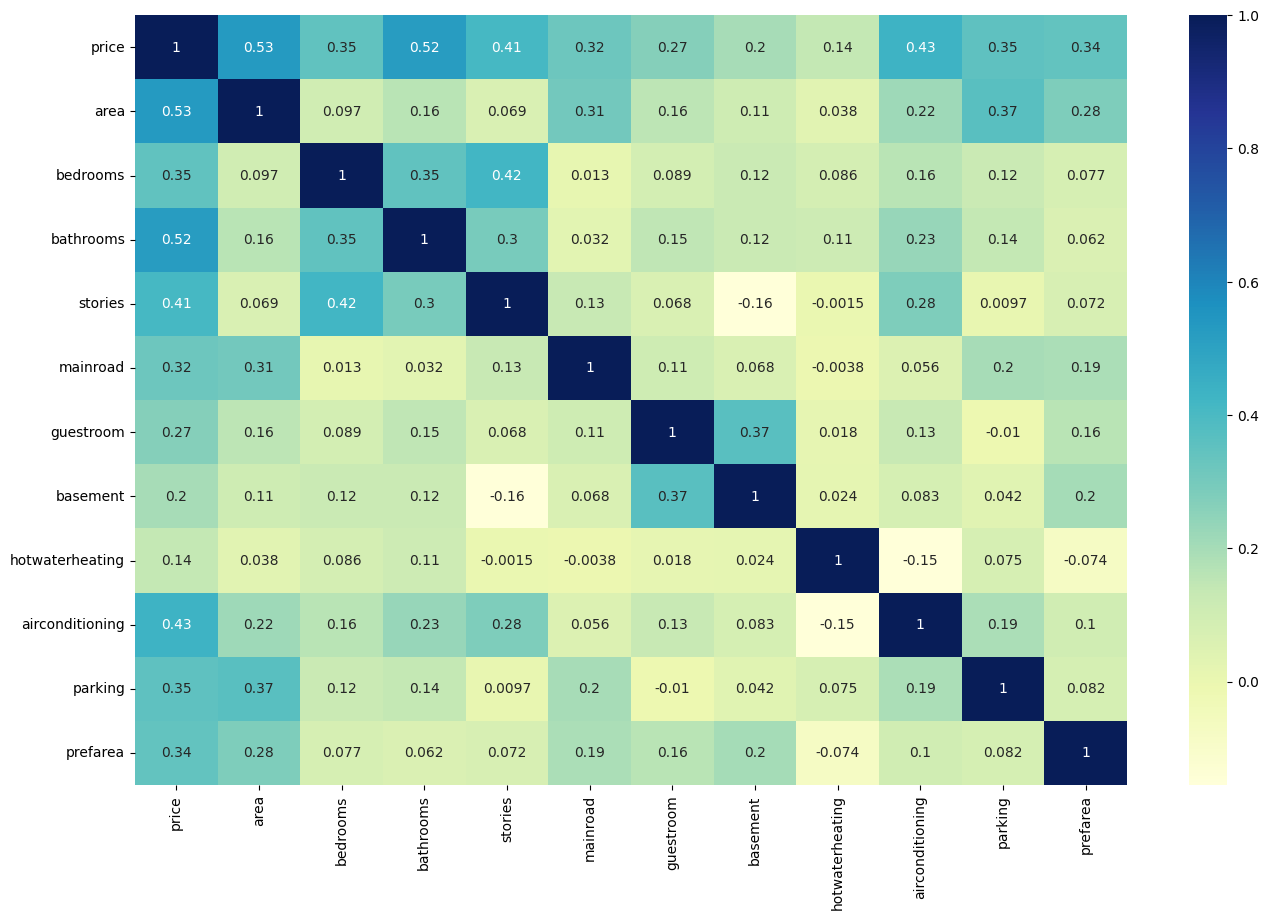

In [94]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `area` seems to the correlated to `price` the most. Let's see a pairplot for `area` vs `price`.

### Dividing into X and Y sets for the model building

In [95]:
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

## Model Building

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE

Recursive feature elimination

In [96]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [97]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [98]:
rfe = RFE(estimator=lm, n_features_to_select=6)            # running RFE
rfe = rfe.fit(X_train, y_train)

In [99]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 2),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 3),
 ('guestroom', False, 5),
 ('basement', False, 6),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 4),
 ('prefarea', True, 1)]

In [100]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [101]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'parking'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [103]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [104]:
lm2 = LinearRegression()
lm2.fit(X_train_rfe, y_train)

LinearRegression()

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [105]:
# compare both linear regression models lm is trained on all features, lm2 is trained on selected features
y_train_price_1 = lm.predict(X_train)
y_train_price_2 = lm2.predict(X_train_rfe)

In [106]:
res_1 = (y_train_price_1 - y_train)
res_2 = (y_train_price_2 - y_train)

In [107]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

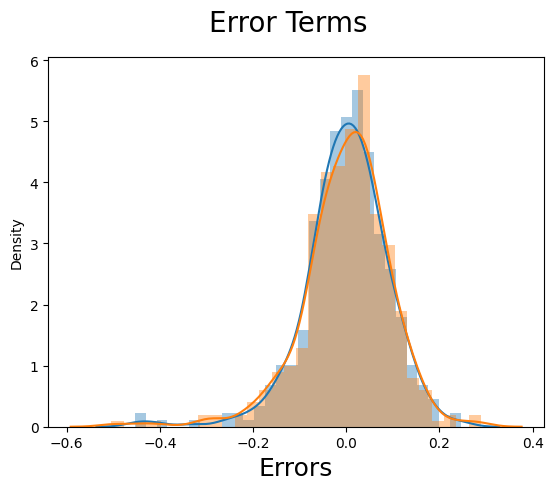

In [110]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res_1, bins = 30)
sns.distplot(res_2, bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [111]:
# compare both linear regression models lm is trained on all features, lm2 is trained on selected features
y_test_price_1 = lm.predict(X_test)
y_test_price_2 = lm2.predict(X_test_rfe)

In [112]:
test_res_1 = (y_test_price_1 - y_test)
test_res_2 = (y_test_price_2 - y_test)

Text(0.5, 0, 'Errors')

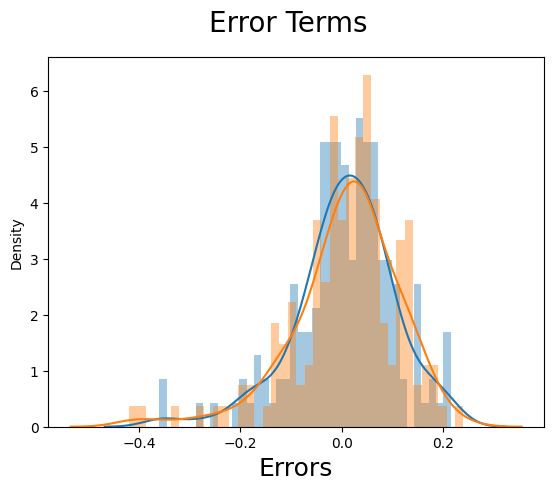

In [114]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(test_res_1, bins = 40)
sns.distplot(test_res_2, bins = 40)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [116]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_price_1)

0.6638974588211837

In [117]:
r2_score(y_test, y_test_price_2)

0.6171279856258436